# Learning Python's basics

It is assumed that you are using Jupyter notebook but these notes also apply with some minor modifications to standard Python. First thing to do is to import the packages we are going to used (numpy numerical python and sympy symbolic python). An then clic the buttom run.

In [2]:
import numpy as np
import sympy as sp

To make nice equations (Latex). You can use also this (only for Jupyter)

In [3]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)

## Monday exercises

Here the exercises we did on Monday that involve to solve an equation and to give a numerical value for it.

You need first to define the symbolic variables using sp.symbols.

In [5]:
V,P,T,nR = sp.symbols('V,P,T,nR')

### Write an equation (Method 1)

You might express the function to solve in the following way $f(x)=0$. So if we want to solve the perfect gas equation $PV = nRT$, this needs to be expressed as $f(P,T,V,n)=PV-nRT=0$ 

In [6]:
myfunction = P*V-nR*T
display(myfunction)

Now you can solve this equation for temperature $T$ by using sp.solve. Note that the solution is given as a list in squared brackets.

In [7]:
myfunction_solved = sp.solve(myfunction,T)
display(myfunction_solved)

### Another way to write an equations (Method 2)

Another way is to define an equation such as $PV = nRT$ directly using sp.Eq just splitting left and right hand sides by a comma.

In [8]:
myfunction = sp.Eq(P*V,nR*T)
display(myfunction)

Now you can solve this equation by using sp.solve

In [9]:
myfunction_solved = sp.solve(myfunction,T)
display(myfunction_solved)


### Evaluate the function (find a numerical value of the function)

Once you have solved an equation for $T$ you migth be interested in evaluating the function for a given values of $P$, $V$ and $nR$. <br> Curiosly, in Python the elements of a row or vector are counted from 0 (in Matlab are counted from 1). So to call the first element of the solutions for an equation you need to type myfunction_solved[0]

In [10]:
myfunction_solved[0]

Remember that this is equal to T

In [11]:
print('T =', myfunction_solved[0])

T = P*V/nR


Now you can substitute the values of P = 1, V = 1 and nR = 1

In [12]:
myfunction_solved[0].subs({P:1,V:1,nR:1})

Remember that this is equal to T

In [13]:
print('T =', myfunction_solved[0].subs({P:1,V:1,nR:1}))

T = 1


### Define a function (Method 3)

A quite direct way to define a function is to use def to define an expression in this case is $T$ being a function of $P$, $V$ and $nR$, i.e. $T(P,V,nR) = \frac{PV}{nR}$, then you can get $T$ by evaluating the function at $P$, $V$ and $nR$, for instance at $T(1,1,1)$

In [18]:
 def temperature(P,V,nR):
    return (P*V)/nR

temperature(1,1,1)

# Plot a function

Plot the following equation $f(x)=2x^2$ from $-100<x<100$

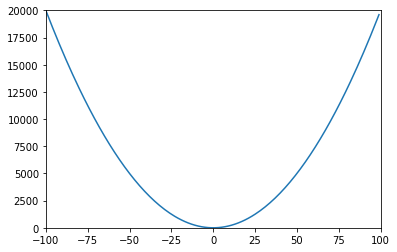

In [4]:
import matplotlib.pyplot as plt

# create a list of x evenly spaced between -100 to 100 with a resolution of 1
x = np.arange(-100, 100, 1)
f = 2*x**2
plt.plot(x, f)
plt.axis([-100, 100, 0, 20000]) # axes range (optional)
plt.show()

# Derivative of a function

Derivate the following function $f(x)=\frac{2x^3}{3}$

In [5]:
x = sp.Symbol('x')
sp.diff(2*x**3/3,x)

# Integrate a function (symbolic/analytical)

Integrate the following function $f(x)=2x^2$

In [44]:
x = sp.Symbol('x')
z = sp.integrate(2*x**2,x)

Definite inegral: integrate over an interval $\int_1^2 2x^2 dx$

In [22]:
sp.integrate(2*x**2,(x,1,2))

As you might notice the above answer is symbolic. If you need a numeric value, then add evalf()

In [23]:
sp.integrate(2*x**2,(x,1,2)).evalf()

# Definite numerical integration 

Numerical integration of the function $f(x)=2x^2$ using quadrature (quad) and the library scipy. Note that the second value of the answer is the error of the numerical integration

In [20]:
from scipy.integrate import quad  
def f(x):
    return 2*x**2

quad(f,1,2)


# Solving a system of equations

You can do this using either numpy or sympy. In this example we use sympy. <br>
Solve the following linear set of equations $$ 2x + 3y = 8 $$ <br> $$x + 2y + z = 8$$ <br> $$3y + 2z = 12$$

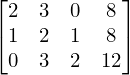

In [34]:
x, y, z = sp.symbols('x, y, z')
system = sp.Matrix(([2, 3, 0, 8],[1, 2, 1, 8],[0, 3, 2, 12]))
display(system)
sp.solve_linear_system(system,x,y,z)